### Project : Investigating Movie Ratings on the Fandango website

#### In this project, we investigate the hypothesis whether movie ratings on the Fandango website are biased. This is based on an earlier investigation by the Data Journalist Walter Hickey in 2015, where he had concluded that the movie ratings were inaccurate and had displayed evidence for the same. 

### 1 - Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import percentileofscore
import seaborn as sns

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

### 2 - Understanding the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.read_csv('fandango_score_comparison.csv').head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
pd.read_csv('movie_ratings_16_17.csv').head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


#### Creating the dataframes for analysis

In [5]:
df_ratings_before = pd.read_csv('fandango_score_comparison.csv')
df_ratings_after = pd.read_csv('movie_ratings_16_17.csv')

In [6]:
## Isolating only the relevant columns for analysis :

df_ratings_before = df_ratings_before[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','Fandango_votes', 'Fandango_Difference']]

df_ratings_after = df_ratings_after[['movie', 'year', 'fandango']]

In [7]:
df_ratings_before.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')

In [8]:
df_ratings_before.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [9]:
df_ratings_after.describe()

,year,fandango
count,214.000000,214.000000
mean,2016.107477,3.894860
std,0.310444,0.516781
min,2016.000000,2.500000
25%,2016.000000,3.500000
50%,2016.000000,4.000000
75%,2016.000000,4.500000
max,2017.000000,5.000000


#### Sample Representativeness based on Readme file analysis

Readme file for df_ratings_before / fandango_score_comparison.csv - https://github.com/fivethirtyeight/data/blob/master/fandango/README.md

Readme file for df_ratings_after / movie_ratings_16_17.csv - 
https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md

Based on the analysis of two readme files, we can conclude that both the samples are not representative of the Population of Interest:

    a) For the 2015 data, it includes only those movies with 30+ votes (A total of 146). 
    b) For the 2016-17 data, it includes 214 of the most popular movies i.e. with high number of total votes (A total of 214)

### 3 - Changing the Goal of our Analysis

#### Based on the Sample Analysis, we will update the goal of the Project by focusing only on the popular movies rather than all the movies. We will try to conclude whether or not, the ratings have been updated for popular movies. This can be a good proxy for the initial goal as well. 

In [10]:
df_ratings_before

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [11]:
df_ratings_after

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


### Updated populations of interest post the goal modification and Isolating the Samples required


Currently we have two populations of interest. 

    1. Popular movies released in 2015
    2. Popular movies released in 2016
    
We will consider 30 votes as the benchmark for popularity. Since the 2016 data doesn't have a 'Votes' column, we can do a random sampling and check for the ratings directly on the Fandango Website. 

In [12]:
df_ratings_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


#### Upon checking the Fandango website, all of the above movies have more than 30 votes. Thus we can consider the 2016 data as consisting of all popular movies. Now we can filter the earlier data set to include only 2015 release movies before we begin the analysis. 

### 4 · Isolating the Samples We Need

In [13]:
df_ratings_before['FILM'][-5:-1]

141                            Mr. Holmes (2015)
142                                   '71 (2015)
143                   Two Days, One Night (2014)
144    Gett: The Trial of Viviane Amsalem (2015)
Name: FILM, dtype: object

In [14]:
df_ratings_before['Year'] = df_ratings_before['FILM'].str[-5:-1]

In [15]:
df_ratings_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

#### We will filter out only those movies that were released in 2015 and 2016

In [16]:
df_ratings_before['Year'] = df_ratings_before['Year'].astype(int)

In [17]:
fandango_2015 = df_ratings_before[df_ratings_before['Year']== 2015].copy()

In [20]:
df_ratings_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [22]:
fandango_2016 = df_ratings_after[df_ratings_after['year']== 2016].copy()

#### Thus the samples have been isolated into two separate dataframes, fandango_2015 and fandango_2016

### 5  · Comparing Distribution Shapes for 2015 and 2016

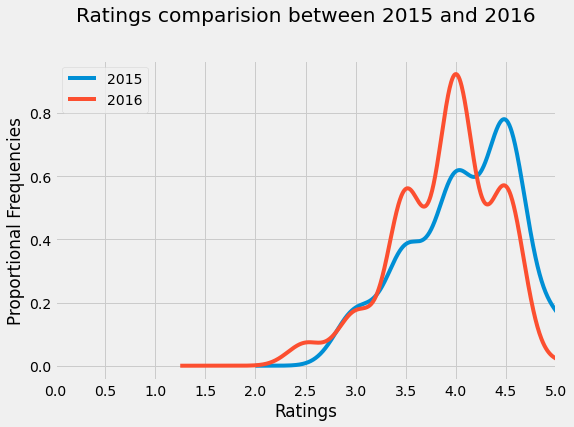

In [45]:
%matplotlib inline
plt.style.use('fivethirtyeight')
from numpy import arange

plt.figure(figsize = (8, 5.5))
fandango_2015['Fandango_Stars'].plot.kde(label = '2015')
fandango_2016['fandango'].plot.kde(label = '2016')
plt.title('Ratings comparision between 2015 and 2016', y = 1.1)
plt.xlabel('Ratings')
plt.ylabel('Proportional Frequencies')
plt.xticks(arange(0,5.1,.5))
plt.xlim([0,5])
plt.legend()

#### Observations from the KDE plots for 2015 and 2016 ratings.


We can make the following observations :

1. Both the plots are left-skewed, indicating a pattern of high ratings for most movies. 
2. The 2016 ratings plot is shifted left, in comparision to the 2015 plot, suggesting that the 2016 ratings are slightly lower in comparision to 2015. 

### 6  · Comparing Relative Frequencies

#### Comparing Frequency Tables for Granular Analysis

In [48]:
fandango_2015['Fandango_Stars'].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [49]:
fandango_2016['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

#### Comparing Proportional Frequency Tables for details

In [52]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [53]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

#### Observations from the comparision of Frequency Tables:

1. In 2015, the lowest rating was 3, with about 8.5% movies whereas in 2016, the lowest rating was 2.5 which was given to 3.1% of the movies. 
2. Movies rated as 5 got reduced from about 7% to 0.5%. Similarly 4.5 rated movies reduced from 37% to 24%. 
3. Ratings 3.5 and 4 saw the highest increase in proportions, i.e. 6% and 12%. 

The shift (lowering) in overall ratings as displayed by the KDE plots can be attributed to the above changes. 

### 7  · Determining the Direction of the Change

In [71]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

In [72]:
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

In [73]:
diff_mean = mean_2016 - mean_2015
diff_mode = mode_2016 - mode_2016
diff_median = median_2016 - median_2016

In [77]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015 ]
summary['2016'] = [mean_2016, median_2016, mode_2016 ]
summary.index = ['Mean', 'Median', 'Mode']
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


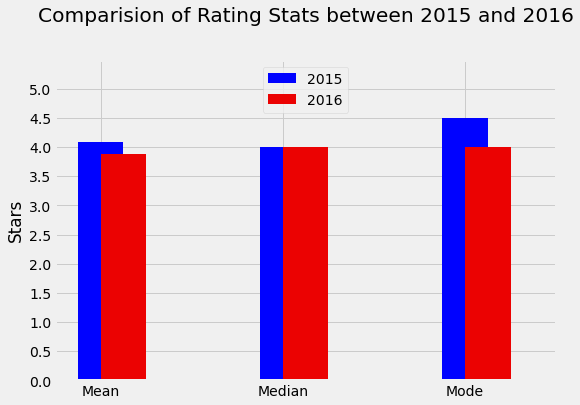

In [103]:
plt.figure(figsize = (8,5.5))

summary['2015'].plot.bar(align = 'center', color = '#0002ff', width = 0.25)
summary['2016'].plot.bar(align = 'edge', color ='#eb0202', width = 0.25)

plt.title('Comparision of Rating Stats between 2015 and 2016', y = 1.1)
plt.xticks(rotation = 0)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.ylim(0, 5.5)
plt.legend(loc = 'upper center')
plt.show()


#### Based on the observation of Summary Statistics, we can conclude :

1. The Mean ratings dropped from about 4 to 3.8 i.e. about a 5% drop.
2. The Mode is also slightly lower by 11.11%, though the Median is the same.

### Conclusion

#### We can conclude that the 2016 ratings were lower than 2015. This can be most likely attributed to the public exposure caused by the Data Journalist's article. Since Fandango used to sell movie tickets, the ratings inflation could have been a way to increase their sales.